## **Multiple Linear Regression: Predicting House Prices**

**Objective:**

Your task is to build a **Multiple Linear Regression** model to predict the price of a house based on various features such as its area, the number of bedrooms, and other amenities. This homework will enhance your understanding of how to handle multiple features in regression and how to evaluate a model's performance.

**Dataset:**

You are provided a dataset with the following columns:
1. **price**: The price of the house (target variable).
2. **area**: The area of the house in square feet.
3. **bedrooms**: The number of bedrooms.
4. **bathrooms**: The number of bathrooms.
5. **stories**: The number of stories the house has.
6. **mainroad**: Whether the house is on a main road (yes/no).
7. **guestroom**: Whether the house has a guestroom (yes/no).
8. **basement**: Whether the house has a basement (yes/no).
9. **hotwaterheating**: Whether the house has hot water heating (yes/no).
10. **airconditioning**: Whether the house has air conditioning (yes/no).
11. **parking**: The number of parking spaces.
12. **prefarea**: Whether the house is in a preferred area (yes/no).
13. **furnishingstatus**: The furnishing status of the house (furnished, semi-furnished, unfurnished).


Steps to Complete:

### **1. Data Loading and Preprocessing**
1. **Load the dataset**:
   - Read the dataset using `pandas`.
   - Display the first few rows to understand the structure.

2. **Handle categorical variables**:
   - Convert binary categorical variables (e.g., `mainroad`, `guestroom`, etc.) to numerical values (1 for "yes" and 0 for "no").
   - For multi-class categorical variables like `furnishingstatus`, use one-hot encoding or dummy variables.

3. **Check for missing values**:
   - Handle missing values by either imputing (e.g., mean or median) or dropping rows/columns as appropriate.

4. **Feature scaling**:
   - Scale numerical features like `area`, `price`, and `parking` to ensure all variables are on a similar scale.

### **2. Build the Multiple Linear Regression Model**
1. **Split the dataset**:
   - Divide the dataset into training (80%) and testing (20%) subsets.

2. **Model implementation**:
   - Use **Scikit-learn** to fit a Multiple Linear Regression model:
     ```python
     from sklearn.linear_model import LinearRegression
     ```
   - Fit the model using training data and extract the coefficients for each feature.

3. **Optional: Manual Implementation**:
   - Use the **Normal Equation** for manual implementation:
    $$
    \beta = (X^T X)^{-1} X^T y
    $$

### **3. Model Evaluation**
1. **Predictions**:
   - Use the model to predict the house prices on the test dataset.

2. **Evaluation Metrics**:
   - Calculate performance metrics:
     - **Mean Absolute Error (MAE)**
     - **Mean Squared Error (MSE)**
     - **R² Score**

3. **Interpretation**:
   - Discuss the significance of coefficients. For example, how much does the price increase for each additional square foot of area or for houses in preferred areas?

### **4. Visualization**
1. **Correlation Matrix**:
   - Plot a heatmap to show the correlation between features and the target variable.

2. **Predictions vs. Actuals**:
   - Create a scatter plot comparing predicted prices with actual prices.

### **5. Predictions**
1. Use the model to predict the price of a house with the following features:
   - **area**: 2400 sq. ft.
   - **bedrooms**: 4
   - **bathrooms**: 3
   - **stories**: 2
   - **mainroad**: yes
   - **guestroom**: no
   - **basement**: yes
   - **hotwaterheating**: no
   - **airconditioning**: yes
   - **parking**: 2
   - **prefarea**: yes
   - **furnishingstatus**: semi-furnished

**Deliverables:**

1. A Python script or Jupyter Notebook containing:
   - Data preprocessing and feature engineering.
   - Implementation of Multiple Linear Regression.
   - Model evaluation and interpretation.
   - Visualizations of correlations and predictions.
2. A brief report discussing:
   - The impact of different features on house prices.
   - Limitations of the model (e.g., assumptions of linearity or multicollinearity issues).

### **1. Data Loading and Preprocessing**
1. **Load the dataset**:
   - Read the dataset using `pandas`.
   - Display the first few rows to understand the structure.

In [185]:
import pandas as pd

df = pd.read_csv(r'data\housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [187]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

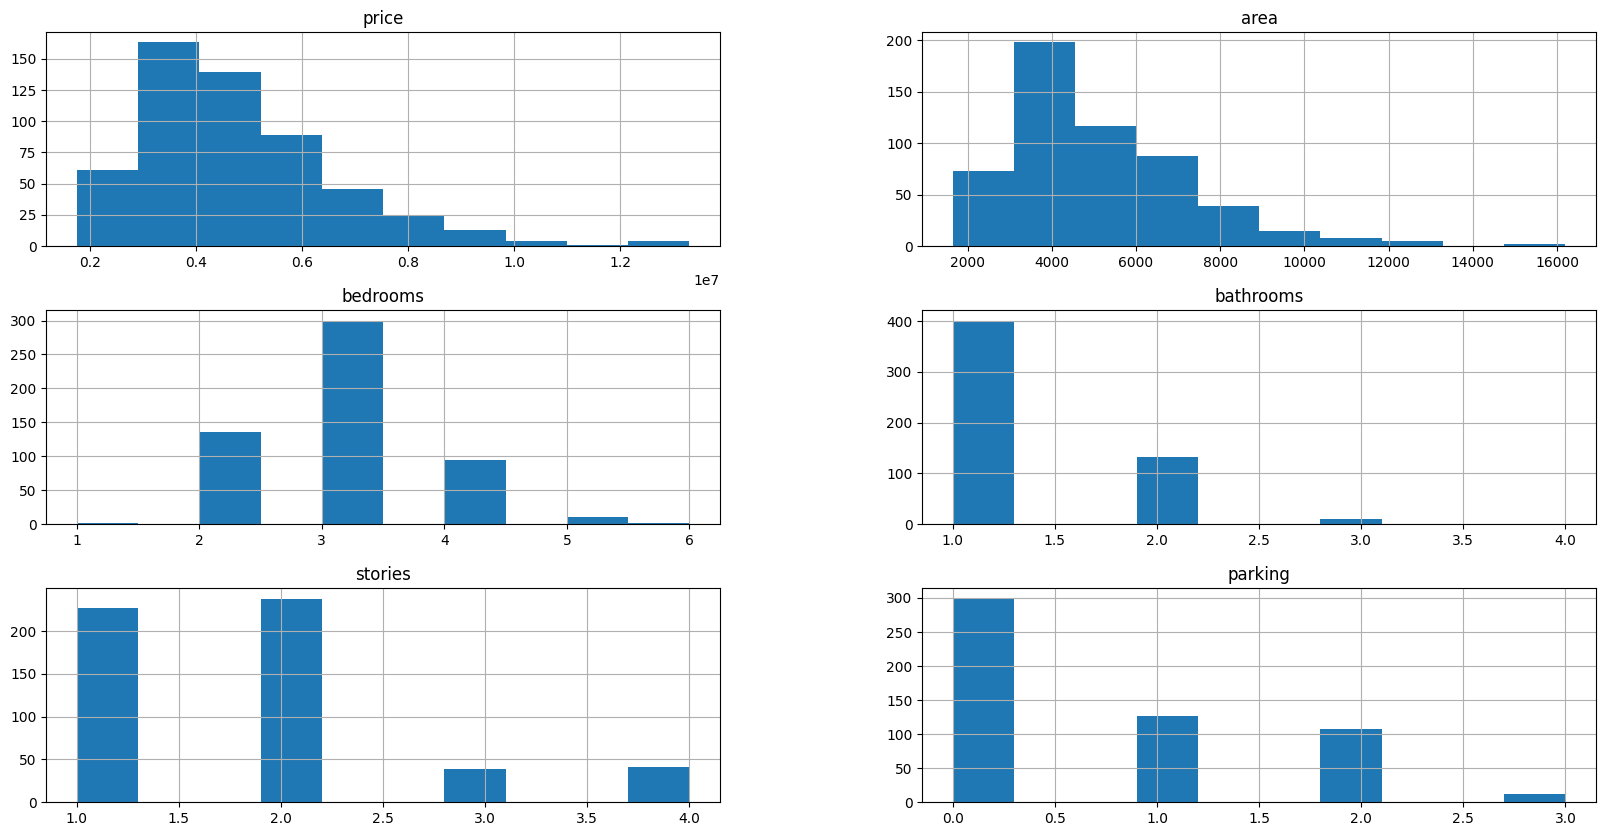

In [188]:
df.hist(figsize=(20,10))

2. **Handle categorical variables**:
   - Convert binary categorical variables (e.g., `mainroad`, `guestroom`, etc.) to numerical values (1 for "yes" and 0 for "no").
   - For multi-class categorical variables like `furnishingstatus`, use one-hot encoding or dummy variables.

In [189]:
# Binary encoding
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [190]:
# One-hot encoding for furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus']).astype(int)
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


3. **Check for missing values**:
   - Handle missing values by either imputing (e.g., mean or median) or dropping rows/columns as appropriate.

In [191]:
df.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [192]:
# Fill or drop missing values
df.fillna(df.median(numeric_only=True), inplace=True)

4. **Feature scaling**:
   - Scale numerical features like `area`, `price`, and `parking` to ensure all variables are on a similar scale.

In [193]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head(10)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1,0,0
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1,0,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0,1,0
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1,0,0
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1,0,0
5,10850000,1.083624,0.047278,3.413810,-0.929397,1,0,1,0,1,1.517692,1,0,1,0
6,10150000,1.581745,1.403419,3.413810,2.532024,1,0,0,0,1,1.517692,1,0,1,0
7,10150000,5.096263,2.759560,3.413810,0.224410,1,0,0,0,0,-0.805741,0,0,0,1
8,9870000,1.360358,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,1,1,0,0
9,9800000,0.276484,0.047278,1.421812,2.532024,1,1,0,0,1,0.355976,1,0,0,1


### **2. Build the Multiple Linear Regression Model**
1. **Split the dataset**:
   - Divide the dataset into training (80%) and testing (20%) subsets.



In [194]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)


2. **Model implementation**:
   - Use **Scikit-learn** to fit a Multiple Linear Regression model:
     ```python
     from sklearn.linear_model import LinearRegression
     ```
   - Fit the model using training data and extract the coefficients for each feature.



In [195]:
# building linear model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print(coeff_df)


                                   Coefficient
area                             546130.441951
bedrooms                          49372.977625
bathrooms                        566882.551570
stories                          357508.515277
mainroad                         412851.361973
guestroom                        203746.424258
basement                         289404.208984
hotwaterheating                  667966.823258
airconditioning                  838763.140885
parking                          214160.482356
prefarea                         788003.466214
furnishingstatus_furnished       133619.179092
furnishingstatus_semi-furnished  137619.700608
furnishingstatus_unfurnished    -271238.879700


3. **Optional: Manual Implementation**:
   - Use the **Normal Equation** for manual implementation:
    $$
    \beta = (X^T X)^{-1} X^T y
    $$

### **3. Model Evaluation**
1. **Predictions**:
   - Use the model to predict the house prices on the test dataset.

2. **Evaluation Metrics**:
   - Calculate performance metrics:
     - **Mean Absolute Error (MAE)**
     - **Mean Squared Error (MSE)**
     - **R² Score**

3. **Interpretation**:
   - Discuss the significance of coefficients. For example, how much does the price increase for each additional square foot of area or for houses in preferred areas?

In [196]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 864449.6549796162
MSE: 1488573926579.6707
R² Score: 0.5881189153239226


### **4. Visualization**
1. **Correlation Matrix**:
   - Plot a heatmap to show the correlation between features and the target variable.

2. **Predictions vs. Actuals**:
   - Create a scatter plot comparing predicted prices with actual prices.

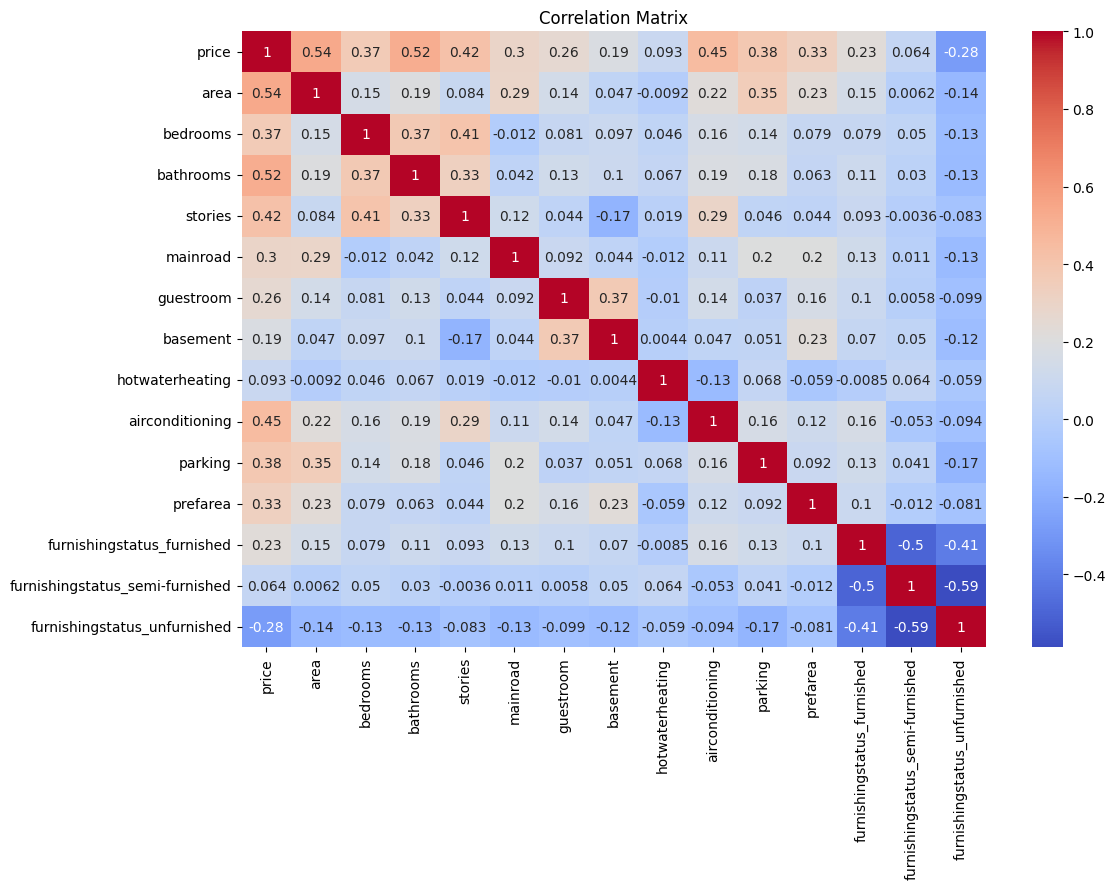

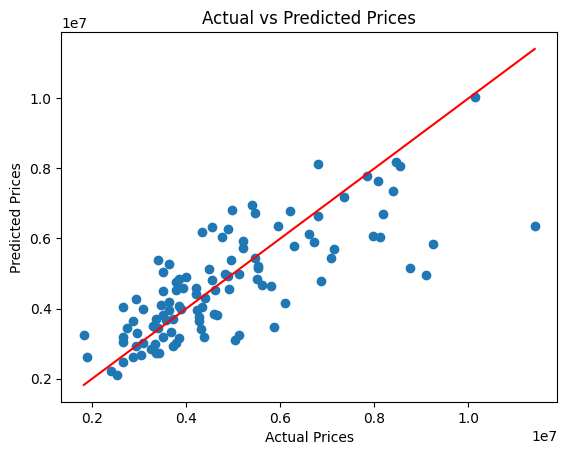

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # diagonal line
plt.show()


### **5. Predictions**
1. Use the model to predict the price of a house with the following features:
   - **area**: 2400 sq. ft.
   - **bedrooms**: 4
   - **bathrooms**: 3
   - **stories**: 2
   - **mainroad**: yes
   - **guestroom**: no
   - **basement**: yes
   - **hotwaterheating**: no
   - **airconditioning**: yes
   - **parking**: 2
   - **prefarea**: yes
   - **furnishingstatus**: semi-furnished

In [198]:
# New data (same order as X_train columns)
new_data = {
    'area': [2400],
    'bedrooms': [4],
    'bathrooms': [3],
    'stories': [2],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [1],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus_furnished': [0],
    'furnishingstatus_semi-furnished': [1],
    'furnishingstatus_unfurnished': [0]
    
}

new_df = pd.DataFrame(new_data)
new_df.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2400,4,3,2,1,0,1,0,1,2,1,0,1,0


In [199]:
#Standardize the new data
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
new_df[numerical_cols] = scaler.transform(new_df[numerical_cols]) 
new_df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,-1.268613,1.403419,3.41381,0.22441,1,0,1,0,1,1.517692,1,0,1,0


In [200]:
#predicting price for new data
prediction = model.predict(new_df)
print(f"Predicted price for the new house: ${prediction[0]:,.2f}")
prediction


Predicted price for the new house: $7,943,876.81


array([7943876.81019636])